In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# 1.Loadig Data

In [ ]:
from sklearn.datasets import load_iris

# import
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


# 2.Basic Statistics

In [ ]:
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [ ]:
iris_df.columns.to_list()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [ ]:
iris_df.rename(columns = {'sepal length (cm)': 'sepal_len', 'sepal width (cm)' : 'sepal_width', 'petal length (cm)': 'petal_len','petal width (cm)': 'petal_width' }, inplace=True)

In [ ]:
iris_df.describe()

,sepal_len,sepal_width,petal_len,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


# 3.Missing values

In [ ]:
iris_df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


# 4.Visualization

# i) Pairplot

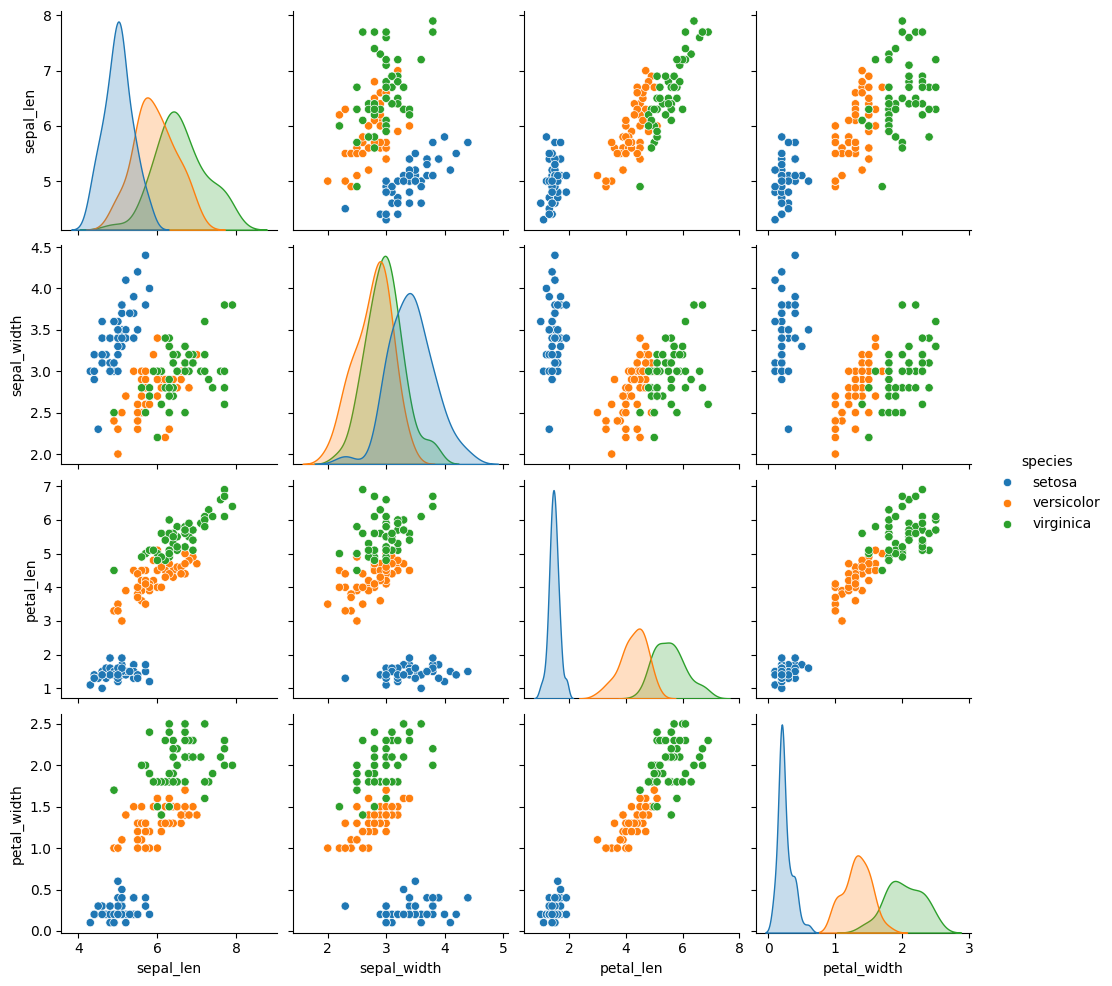

In [ ]:
#visualize distributions and relationships between variables
# Iris species
sns.pairplot(data =iris_df, hue = 'species', diag_kind='kde')
plt.show()

From the above representation;


1. Setosa can easily be identified and distinguished from the rest of the species using as petal related feature because it is significantly smaller than the rest of the species.


2. Versicolor and Virginia have overlpped in most of cases and therefore difficult to distinguish  from each other. However, Virginica has slightly larger values for both petal width and length.


3. Petal width and petal length show the relatively more discriminative features with a clear cluster of species in the scatter plots.

# ii) Boxplot

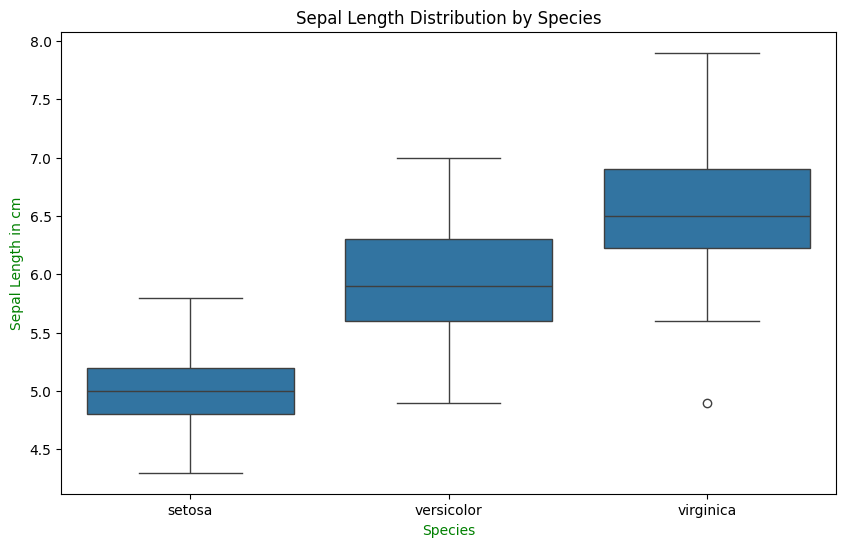

In [ ]:
#Sepal Length Distribution by Species
plt.figure(figsize = (10, 6))
sns.boxplot(data= iris_df, x = 'species', y = 'sepal_len' )
plt.title('Sepal Length Distribution by Species')
plt.xlabel('Species', color = 'g')
plt.ylabel('Sepal Length in cm', color = 'g')
plt.show()

From the above boxplot;

1. Setosa - The values range between 4.5 and 5.0 and no outliers. Setosa has a median of around 5.0cm indicating that 50% of the setosa sepal lenths is below 5.0cms. The interquartile range is relatively small indicating tat there is small variability of the sepal lengths under consideration.


2. Versicolor - The median is 6.0cm indicating that 50 % of the sepal length collected a length of 6.0 cm or less. The interquartile range is relatively bigger than that of setosa indicating a higher variability compared to that of Setosa.


3. Virginica - It is the species with the highest sepal median almost 6.5 cm. This indicates that 50% of the lengths are more than 6.0cm and less or equal to 6.5 cm. The interquartile range is bigger compared to the rest of the two species hence more variability of the sepal length.

# 5.Multivariate analysis

# i)Heatmap

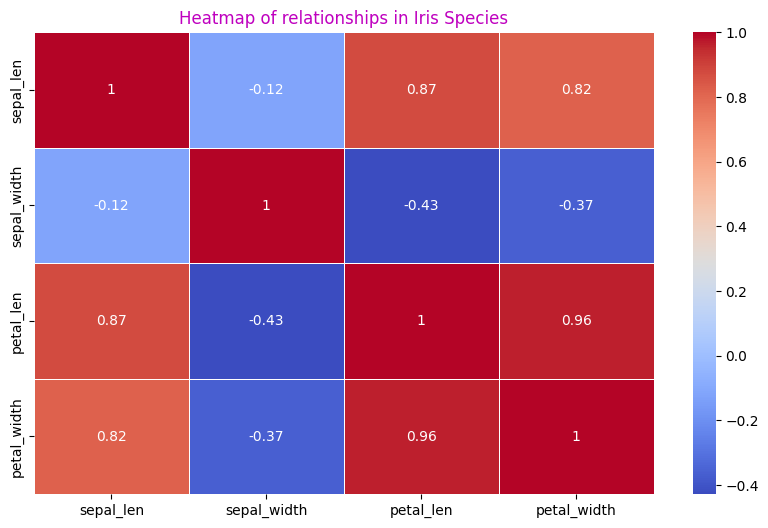

In [ ]:
plt.figure(figsize = (10, 6))
corre_of_species_matrix = iris_df.iloc[:, :-1].corr()
sns.heatmap(corre_of_species_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of relationships in Iris Species', color = 'm')
plt.show()

From the heatmap above;

1. Strong and positive correlations

 i) Petal length and petal witdth - these two variables have a very strong and a positive correlation for there is increase of one against the other. It indicates that the petals are closely related.

 ii) Sepal length and petal length - these two variable have a strong and positive relations although its lower than that of the pure petal features. It suggests that Iris tend to have longer sepals and petals.

 iii) Sepal length and petal width - these two variable have a strong and positive correlation which is lower than that of the two above. It indicates that larger sepals are also associated with wider petals.


 2. Weak and Negative correlations

  i) Sepal width and all other features - sepal width and other variable have a weak and a negative correlation. -Sepal length and sepal width - these two variables have a weak and negative correlation meaning that there is little or no relationship between them. Petal length and petal width with sepal width- there is a weak and negative correlation between them. It means that Iris flowers with wider sepals might have narrow or short petals and the relationship is weak.


